<a href="https://colab.research.google.com/github/Alessandro1103/ML/blob/main/MLEx18_Autoencoder_latent_space.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Exercise 18

# Autoencoder latent space

Analysis of the latent space for a 8-values autoencoder

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import Input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adam, Nadam

# Data set

Dataset: 8 values in 1-out-of-8 encoding

In [ ]:
X = []
for i in range(8):
    x = [0,0,0,0,0,0,0,0]
    x[i] = 1
    X.append(x)
X = np.array(X)

print("Input: %s" %str(X.shape))
print(X)

Input: (8, 8)
[[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]]


# Model

Define an autoencoder with
  
  - 8 input nodes

  - 3 hidden nodes
  
  - 8 output nodes

A custom loss function is defined to guide the encoded values in the latent space to be close to 0 and 1 (i.e., away from 0.5)


In [ ]:
ninput = 8
noutput = 8
nhidden = 3
lrate = 1e-3

# Model definition

i = Input(shape=(ninput,))
code = Dense(nhidden, activation='sigmoid', name='enc')(i)
o = Dense(noutput, activation='sigmoid', name='dec')(code)
model = Model(i,o)

# encoder
il = model.get_layer(index=0).input
ol = model.get_layer(name='enc').output
menc = Model(inputs=il, outputs=ol)

# Loss definition
# keeps values of latent space away from 0.5
# h: hyper-parameter for weighting this part of the loss

def myloss(h, menc):
    def myloss_fn(y_true, y_pred):
        z = menc(y_true) # latent values
        return tf.keras.metrics.mean_squared_error(y_true, y_pred) + \
            h * (1 - tf.keras.metrics.mean_squared_error(0.5, z))
    return myloss_fn

# hyper-parameter of myloss
h = 0.01
lossfn = myloss(h, menc)
iepoch = 0

opt = Adam(learning_rate=lrate)
model.compile(loss=lossfn, optimizer=opt, metrics=['accuracy'])
print("Created new model i:%d h:%d o:%d" %(ninput,nhidden,noutput))
model.summary()

Created new model i:8 h:3 o:8
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 enc (Dense)                 (None, 3)                 27        
                                                                 
 dec (Dense)                 (None, 8)                 32        
                                                                 
Total params: 59 (236.00 Byte)
Trainable params: 59 (236.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Train the autoencoder

Note: the dataset X is given as both input and output!

Run this cell again to continue training the model.

In [ ]:
batch_size = 16
nepoch = 1000
iters = 10

for i in range(iters):
  h = model.fit(X, X, batch_size=batch_size, epochs=nepoch, verbose=0)
  current_loss = h.history['loss'][len(h.history['loss'])-1]
  current_acc = h.history['accuracy'][len(h.history['accuracy'])-1]
  iepoch += nepoch
  print("Epoch %d - Accuracy %.2f Loss %f"  %(iepoch,current_acc,current_loss))


Epoch 21000 - Accuracy 1.00 Loss 0.007954
Epoch 22000 - Accuracy 1.00 Loss 0.007781
Epoch 23000 - Accuracy 1.00 Loss 0.007661
Epoch 24000 - Accuracy 1.00 Loss 0.007608
Epoch 25000 - Accuracy 1.00 Loss 0.007576
Epoch 26000 - Accuracy 1.00 Loss 0.007555
Epoch 27000 - Accuracy 1.00 Loss 0.007541
Epoch 28000 - Accuracy 1.00 Loss 0.007530
Epoch 29000 - Accuracy 1.00 Loss 0.007522
Epoch 30000 - Accuracy 1.00 Loss 0.007517


# Analysis of the encoder

Display the latent space

1/1 [==============================] - 0s 32ms/step
[[ 1.000  1.000  0.000]
 [ 0.000  0.000  0.000]
 [ 0.000  0.000  1.000]
 [ 1.000  1.000  1.000]
 [ 0.000  1.000  0.000]
 [ 1.000  0.000  1.000]
 [ 0.000  1.000  1.000]
 [ 1.000  0.000  0.000]]


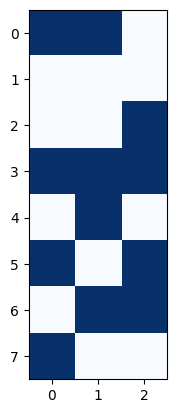

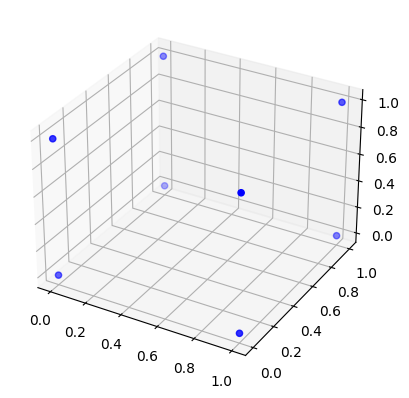

In [ ]:
np.set_printoptions(precision=3, formatter={'float':lambda x: '%6.3f' %x}, suppress=True)

code = menc.predict(X)
print(code)

plt.imshow(code, cmap=plt.cm.Blues)

fig = plt.figure()
ax = plt.axes(projection='3d')


# Data for three-dimensional scattered points

xdata = code[:,0]
ydata = code[:,1]
zdata = code[:,2]
ax.scatter3D(xdata, ydata, zdata, c='blue');

# Analysis of the decoder

Show decoded values

1/1 [==============================] - 0s 52ms/step
[[ 0.000  0.996  0.002  0.000  0.004  0.000  0.000  0.002]
 [ 0.000  0.001  0.997  0.000  0.000  0.004  0.004  0.000]
 [ 0.005  0.001  0.000  0.000  0.996  0.000  0.004  0.000]
 [ 0.000  0.000  0.001  0.012  0.001  0.000  0.996  0.000]
 [ 0.005  0.004  0.000  0.000  0.000  0.004  0.000  0.996]
 [ 0.000  0.000  0.001  0.012  0.000  0.996  0.000  0.001]
 [ 0.995  0.000  0.000  0.012  0.000  0.000  0.000  0.003]
 [ 0.001  0.000  0.000  0.983  0.000  0.001  0.001  0.000]]


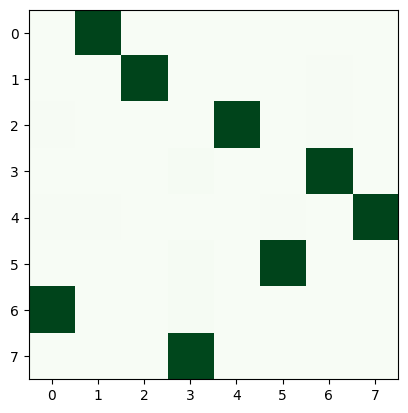

In [ ]:
il = Input(shape=(3,))
ol = model.layers[-1](il)

mdec = Model(inputs=il, outputs=ol)

C = np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,0,1],[1,1,0],[1,1,1]])


Xdec = mdec.predict(C)
print(Xdec)
plt.imshow(Xdec, cmap=plt.cm.Greens)


# Anomaly detection

Let's consider anomalies (i.e., inputs that are not 1-out-of-8 encodings)

1/1 [==============================] - 0s 21ms/step
[[ 0.995  0.000  0.000  0.012  0.000  0.000  0.000  0.003]
 [ 0.004  0.001  0.000  0.000  0.996  0.000  0.004  0.000]
 [ 0.005  0.004  0.000  0.000  0.000  0.004  0.000  0.996]
 [ 0.000  0.988  0.001  0.000  0.009  0.000  0.000  0.001]
 [ 0.988  0.000  0.000  0.006  0.000  0.000  0.000  0.008]
 [ 0.000  0.000  0.001  0.012  0.000  0.996  0.000  0.001]
 [ 0.000  0.000  0.000  0.001  0.000  0.000  0.000  0.000]]
[2.297904959187104e-05, 6.136863056938569e-06, 8.545111063288256e-06, 0.12282052767716607, 0.12293844911535287, 0.24700646625562633, 2.6489557414355973e-07]


<BarContainer object of 7 artists>

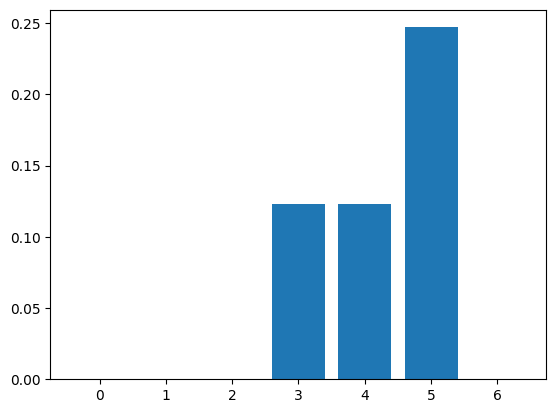

In [ ]:
import sklearn.metrics

test = np.array([
    [1,0,0,0,0,0,0,0],
    [0,0,0,0,1,0,0,0],
    [0,0,0,0,0,0,0,1],
    [0,1,0,0,1,0,0,0],
    [1,0,0,0,0,0,0,1],
    [0,1,0,1,0,1,0,0],
    [0,0,0,0,0,0,0,0],
    ])

ytest = model.predict(test)
print(ytest)
results = [sklearn.metrics.mean_squared_error(test[i],ytest[i]) for i in range(0,len(test))]
print(results)

fig = plt.figure()
plt.bar(range(0,len(test)),results)


# Home Exercises

**Question 1**

Compare the performance of the autoencoder with respect to the use of different loss functions.

**Question 2**

Evaluate performance of the autoencoder with respect to the hyper-parameter h of the custom loss function.

Note: you may need to increase the number of epochs to properly assess performance.
